<a href="https://colab.research.google.com/github/igorvojnyak/datavojnyak.github.io/blob/master/TextsClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install contractions

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
import spacy
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import contractions_dict
import contractions
import unicodedata
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('/content/yelp.csv')
data['length'] = data['text'].apply(len)
data['length'] = data['length'].replace(0,np.nan)
data['length'].isnull().sum()
data = data.dropna(subset=['length'])

Text(0, 0.5, 'length of words in 1 text')

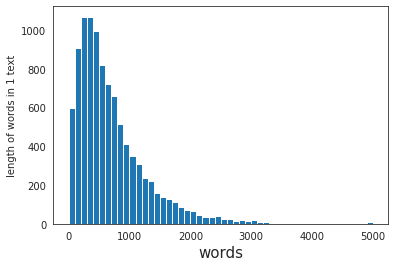

In [5]:
data['length'].plot(bins=50, kind='hist') 
plt.xlabel('words', fontsize=15)
plt.ylabel('length of words in 1 text', fontsize=10)

In [0]:
data['text'] = data['text'].apply(lambda x:[contractions.fix(word) for word in x.split()])

In [0]:
data['text'] = [' '.join(map(str, l)) for l in data['text']]

In [0]:
def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

In [0]:
data['text'] = data['text'].apply(preprocessing)

In [10]:
import nltk
nltk.download('punkt')
data['token'] = data['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
punc = string.punctuation
data['text'] = data['token'].apply(lambda x: [word for word in x if word not in punc])  

In [12]:
data['text'][:10]

0    [my, wife, took, me, here, on, my, birthday, f...
1    [i, have, no, idea, why, some, people, give, b...
2    [love, the, gyro, plate, rice, is, so, good, a...
3    [rosie, dakota, and, i, love, chaparral, dog, ...
4    [general, manager, scott, petello, is, a, good...
5    [quiessence, is, simply, put, beautiful, full,...
6    [drop, what, you, are, doing, and, drive, here...
7    [luckily, i, did, not, have, to, travel, far, ...
8    [definitely, come, for, happy, hour, prices, a...
9    [nobuo, shows, his, unique, talents, with, eve...
Name: text, dtype: object

In [13]:
 import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
data = data.copy()
def remove_num(text):
    return(''.join(ch for ch in text if not ch.isdigit()))

In [15]:
import nltk
nltk.download('averaged_perceptron_tagger')
data['pos_tags'] = data['text'].apply(nltk.pos_tag)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return(wordnet.ADJ)
    elif tag.startswith('V'):
        return(wordnet.VERB)
    elif tag.startswith('N'):
        return(wordnet.NOUN)
    elif tag.startswith('R'):
        return(wordnet.ADV)
    else:
        return(wordnet.NOUN)

In [17]:
import nltk
nltk.download('wordnet')
data['wordnet_pos'] = data['pos_tags'].apply(lambda x:[(word, (get_wordnet_pos(pos_tag))) for (word, pos_tag) in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
wnl  = WordNetLemmatizer()
data['lemmatized'] = data['wordnet_pos'].apply(lambda x:[wnl.lemmatize(word, get_wordnet_pos(tag)) for word, tag in x])

In [0]:
data['text_str'] = [' '.join(map(str, l)) for l in data['lemmatized']]

In [20]:
data['text_str'][:10]

0    wife took birthday breakfast excellent weather...
1    idea people give bad review place go show plea...
2    love gyro plate rice good also dig candy selec...
3    rosie dakota love chaparral dog park convenien...
4    general manager scott petello good egg go deta...
5    quiessence simply put beautiful full window ea...
6    drop drive ate go back next day food good cute...
7    luckily travel far make connecting flight than...
8    definitely come happy hour price amazing sake ...
9    nobuo show unique talent everything menu caref...
Name: text_str, dtype: object

In [0]:
from textblob import TextBlob

In [0]:
data['sentiment'] = data['text_str'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [23]:
data['sentiment']

0       0.425333
1       0.170000
2       0.600000
3       0.566667
4       0.361111
          ...   
9995    0.231731
9996    0.375541
9997    0.292460
9998   -0.112500
9999    0.245455
Name: sentiment, Length: 10000, dtype: float64

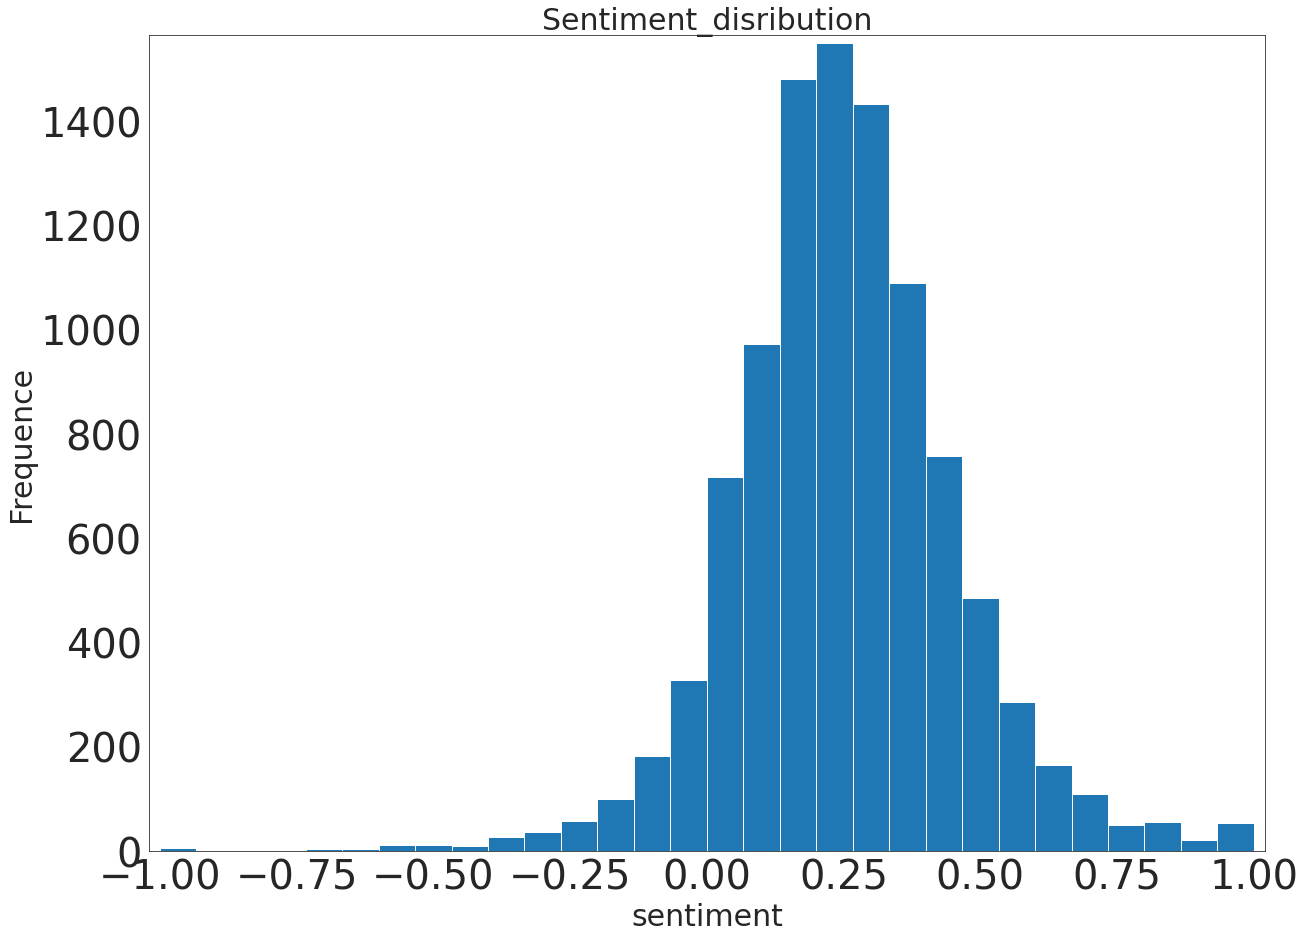

In [24]:
plt.figure(figsize=(20,15))
plt.margins(0.01)
plt.xlabel('sentiment', fontsize=30)
plt.xticks(fontsize=40)
plt.ylabel('Frequence', fontsize=30)
plt.yticks(fontsize=40)
plt.hist(data['sentiment'], bins=30)
plt.title('Sentiment_disribution', fontsize=30)
plt.show()

In [0]:
data['count_words'] = data['lemmatized'].astype(str).apply(len)

In [26]:
data[['count_words','lemmatized']]

,count_words,lemmatized
0,776,"[wife, took, birthday, breakfast, excellent, w..."
1,1079,"[idea, people, give, bad, review, place, go, s..."
2,78,"[love, gyro, plate, rice, good, also, dig, can..."
3,405,"[rosie, dakota, love, chaparral, dog, park, co..."
4,373,"[general, manager, scott, petello, good, egg, ..."
...,...,...
9995,598,"[first, visit, lunch, today, used, groupon, or..."
9996,825,"[called, house, deliciousness, could, go, item..."
9997,1288,"[recently, visited, olive, ivy, business, last..."
9998,768,"[nephew, moved, scottsdale, recently, bunch, f..."


In [27]:
words = data['lemmatized']
all_words = []
for wordlist in words:
    all_words += wordlist
print(all_words)
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



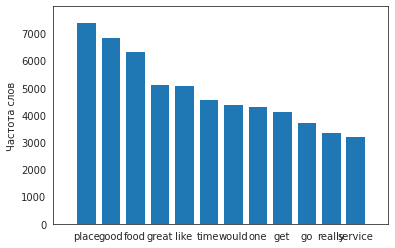

In [28]:
from nltk.probability import FreqDist
common_words = FreqDist(all_words).most_common(12)
x, y = zip(*common_words)
plt.margins(0.08)
plt.bar(x, y)
plt.ylabel('Частота слов', fontsize = 10)
plt.show()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
matrix1 = cv.fit_transform(data.text_str)
#matrix_names = vectorizer1.get_feature_names()

In [0]:
tfid_vc = TfidfVectorizer(max_df=500, min_df=10, use_idf=True)
matrix = tfid_vc.fit_transform(data.text_str)
tv_matrix = matrix.toarray()
vocab = tfid_vc.get_feature_names()
#pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

In [0]:
vocab = vectorizer.get_feature_names()
pd.DataFrame(preds, columns=vocab)

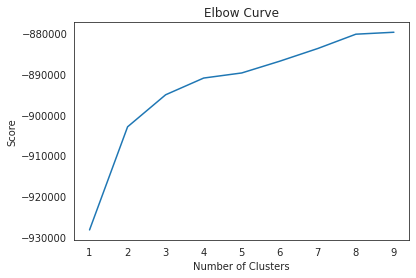

In [34]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(matrix1.toarray()).score(matrix1.toarray()) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [33]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
model = KMeans(n_clusters=5, random_state=42)
svd = TruncatedSVD(n_components=1000, random_state=321)
features = svd.fit_transform(matrix1.toarray())
preds = model.fit_predict(features)
print(list(preds))
#print(dataset.target)

[3 0 4 ... 2 4 4]


In [35]:
print(list(preds))

[3, 0, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 3, 4, 2, 4, 2, 4, 3, 4, 4, 4, 4, 0, 3, 3, 3, 4, 3, 4, 0, 3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 4, 0, 4, 2, 1, 1, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 0, 4, 2, 0, 3, 3, 4, 4, 4, 2, 3, 0, 3, 1, 4, 0, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 3, 4, 2, 4, 2, 3, 4, 4, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 0, 3, 3, 4, 4, 2, 4, 4, 0, 3, 4, 4, 2, 4, 4, 3, 4, 0, 4, 4, 4, 4, 3, 0, 4, 2, 3, 3, 4, 4, 4, 3, 0, 4, 0, 3, 4, 4, 4, 3, 0, 4, 4, 4, 3, 2, 4, 4, 3, 4, 4, 3, 4, 2, 2, 4, 4, 3, 3, 0, 4, 4, 4, 3, 2, 4, 3, 2, 3, 0, 4, 4, 4, 4, 2, 3, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3, 4, 2, 4, 0, 4, 0, 3, 4, 0, 3, 4, 0, 4, 3, 4, 1, 3, 4, 4, 4, 0, 2, 0, 3, 0, 4, 3, 4, 4, 4, 4, 3, 4, 3, 3, 4, 2, 4, 4, 4, 2, 4, 3, 4, 3, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 2, 0, 1, 4, 3, 4, 4, 4, 2, 4, 2, 4, 4, 0, 3, 4, 0, 4, 0, 4, 3, 0, 3, 0, 4, 3, 3, 4, 4, 4, 4, 1, 4, 4, 4, 4, 2, 3, 4, 3, 4, 2, 4, 3, 0, 4, 3, 3, 4, 3, 4, 3, 4, 0, 0, 1, 0, 4, 0, 2, 